In [3]:
# Setup imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

In [16]:
df = pd.read_csv("Country-data.csv")
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (167, 10)

First few rows:
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [17]:
features = df.drop(columns=["country", "exports", "imports"]).columns.copy()

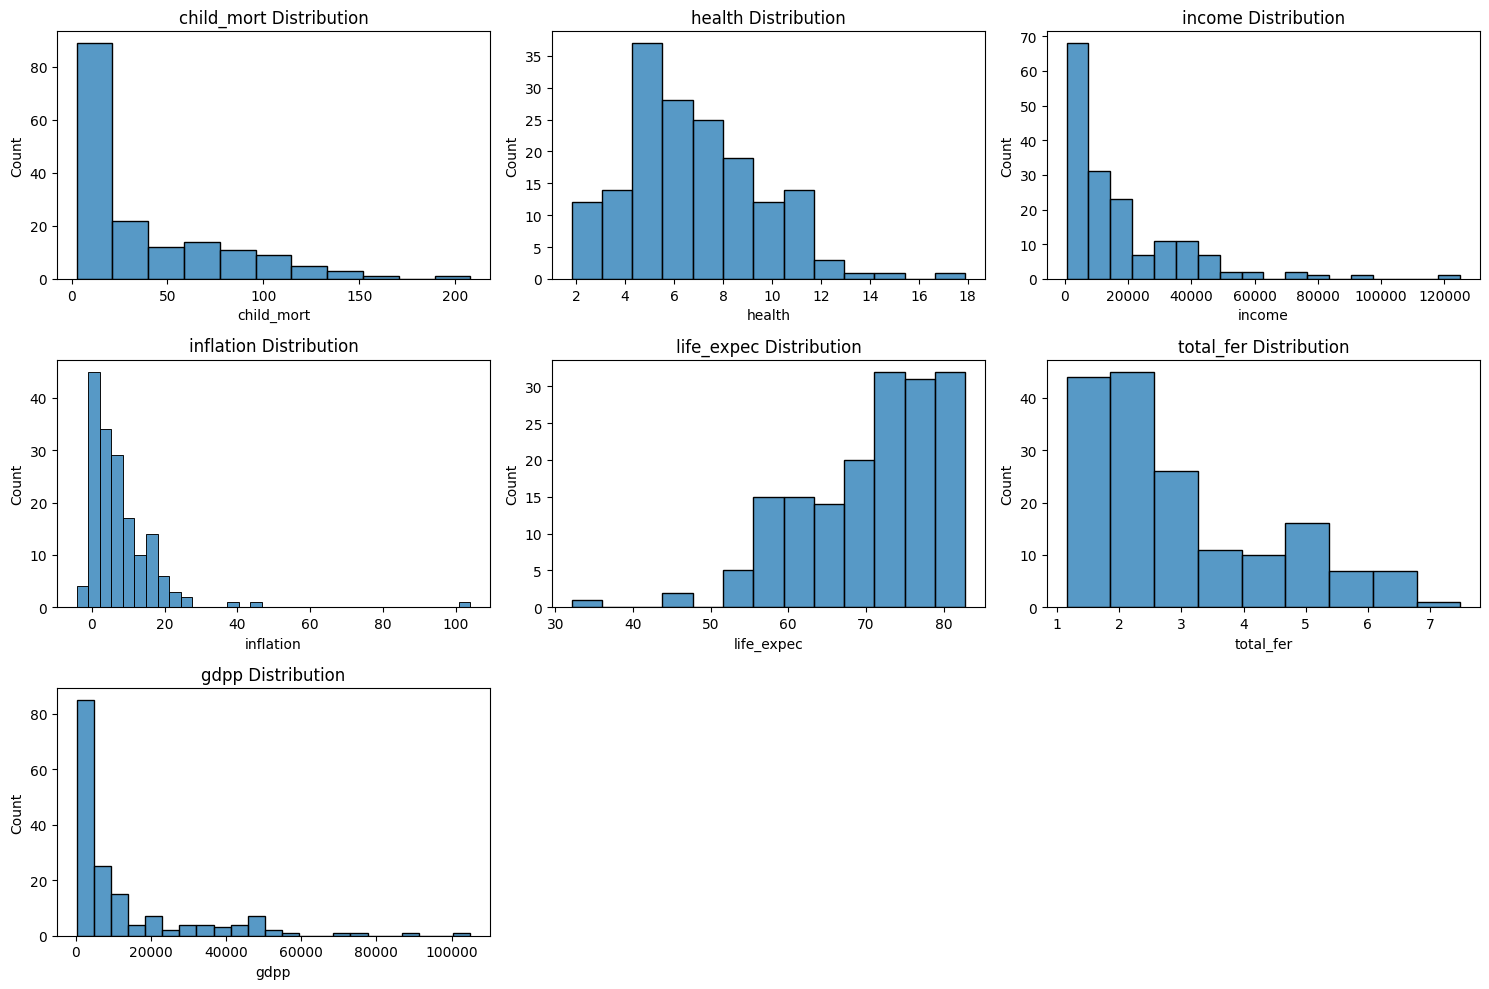

In [18]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=feature)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

In [19]:
scaler = StandardScaler()
X = df[features].values
X_scaled = scaler.fit_transform(X)

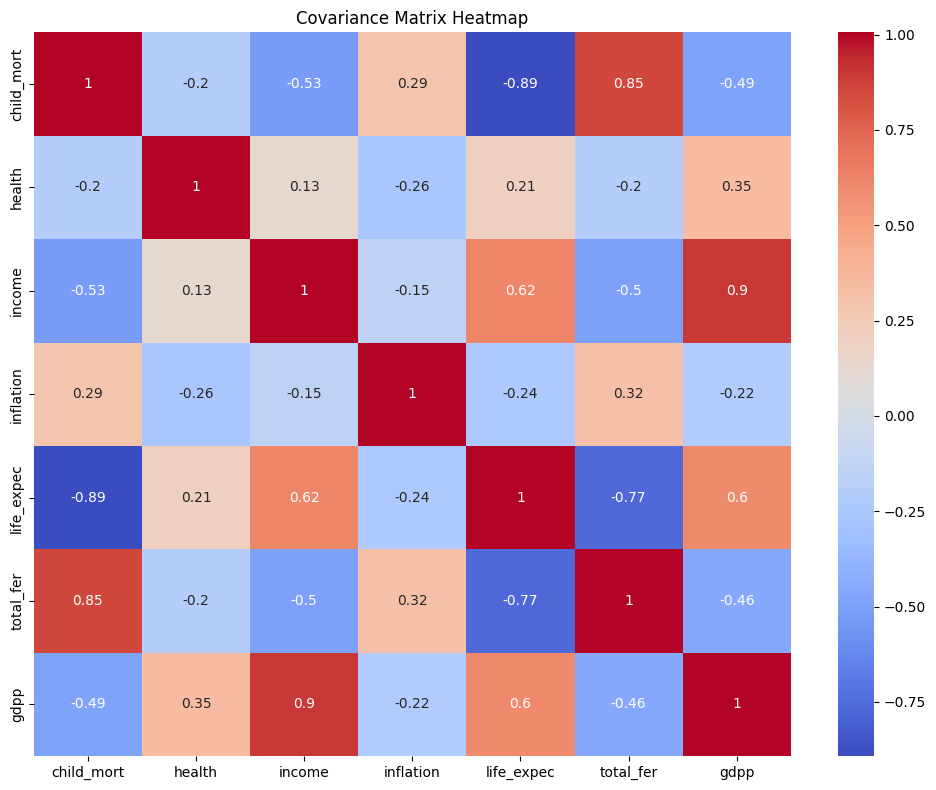

In [20]:
cov_matrix = np.cov(X_scaled, rowvar=False)
# Plot the covariance matrix with names
plt.figure(figsize=(10, 8))
sns.heatmap(
    cov_matrix,
    xticklabels=features,
    yticklabels=features,
    annot=True,
    cmap="coolwarm"
)
plt.title("Covariance Matrix Heatmap")
plt.tight_layout()
plt.show()

In [22]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues_sum = np.sum(eigenvalues)

print("Signal to noise ratio:")
for i, eigenvalue in enumerate(eigenvalues, 1):
    print(f"Eigenvalue {i}: {eigenvalue / eigenvalues_sum:.3f}")



Signal to noise ratio:
Eigenvalue 1: 0.549
Eigenvalue 2: 0.154
Eigenvalue 3: 0.142
Eigenvalue 4: 0.100
Eigenvalue 5: 0.033
Eigenvalue 6: 0.010
Eigenvalue 7: 0.013


In [24]:
acc = 0
i = 0
while acc / eigenvalues_sum < 0.8:
    acc += eigenvalues[i]
    i += 1

print(f"Number of components required for 80% variance: {i}")

Number of components required for 80% variance: 3


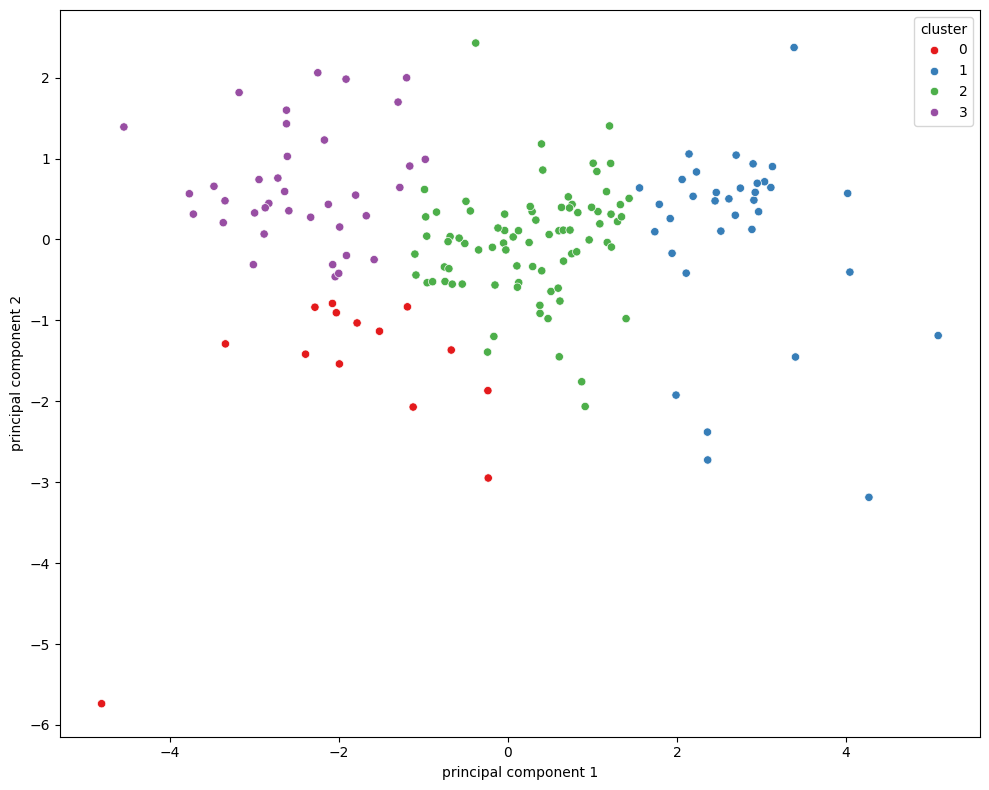

In [59]:
# Pick first 2 principal components
# Then do k-means with k=4
# Then plot the clusters

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

kmeans_2d = KMeans(n_clusters=4, random_state=503)
kmeans_2d.fit(X_pca_2d)

df_2d = pd.DataFrame(X_pca_2d, columns=["principal component 1", "principal component 2"])
df_2d["cluster"] = kmeans_2d.labels_


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_2d, x="principal component 1", y="principal component 2", hue="cluster", palette="Set1")
plt.tight_layout()
plt.show()

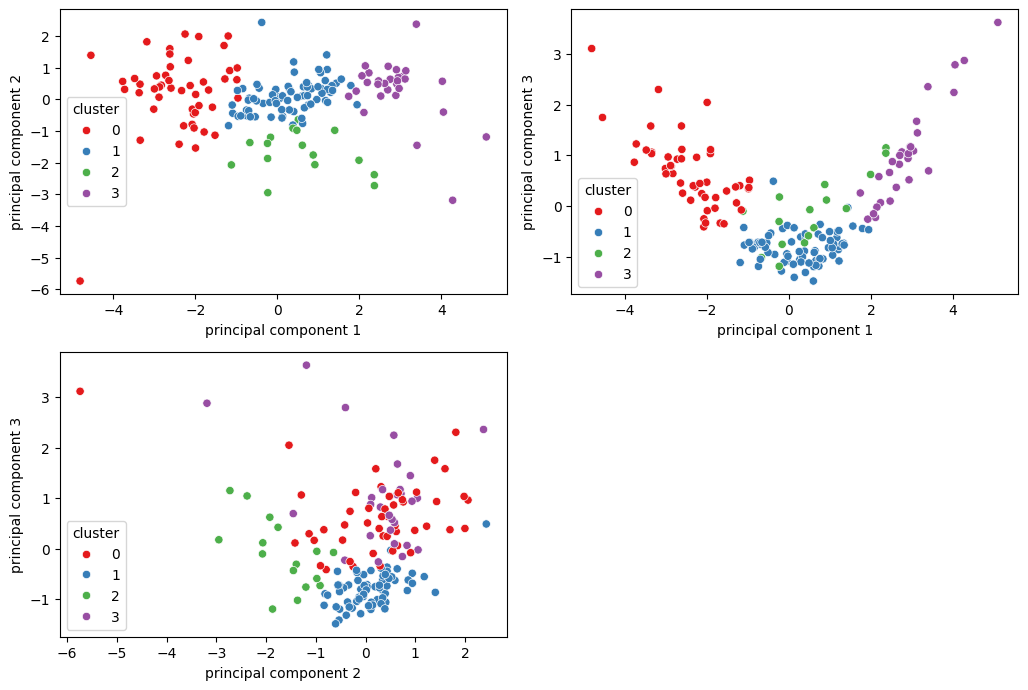

In [60]:
# Now take 3 principal components
# And make pair-wise scatter plots

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

kmeans_3d = KMeans(n_clusters=4, random_state=503)
kmeans_3d.fit(X_pca_3d)

df_3d = pd.DataFrame(X_pca_3d, columns=["principal component 1", "principal component 2", "principal component 3"])
df_3d["cluster"] = kmeans_3d.labels_

plt.figure(figsize=(15, 10))

for i in range(3):
    for j in range(i+1, 3):
        plt.subplot(3, 3, i * 3 + (j - i) + 1)
        sns.scatterplot(data=df_3d, x=f"principal component {i+1}", y=f"principal component {j+1}", hue="cluster", palette="Set1")
plt.tight_layout()
plt.show()


In [66]:
k_means_full = KMeans(n_clusters=4, random_state=503)
k_means_full.fit(X_scaled)

df_full = pd.DataFrame(X_scaled, columns=features)
df_full["cluster"] = k_means_full.labels_

print("Difference between original and PCA clusters:")
print("Cluster sizes:")
print(f"PCA 2D: {df_2d['cluster'].value_counts().to_list()}")
print(f"PCA 3D: {df_3d['cluster'].value_counts().to_list()}")
print(f"Full: {df_full['cluster'].value_counts().to_list() }")


print("\nInertia:")
print("PCA 2D:", kmeans_2d.inertia_)
print("PCA 3D:", kmeans_3d.inertia_)
print("Full:", k_means_full.inertia_)

from sklearn.metrics import silhouette_score

print("\nSilhouette Score:")
print("PCA 2D:", silhouette_score(X_pca_2d, kmeans_2d.labels_))
print("PCA 3D:", silhouette_score(X_pca_3d, kmeans_3d.labels_))
print("Full:", silhouette_score(X_scaled, k_means_full.labels_))


Difference between original and PCA clusters:
Cluster sizes:
PCA 2D: [81, 37, 35, 14]
PCA 3D: [74, 48, 29, 16]
Full: [76, 48, 29, 14]

Inertia:
PCA 2D: 228.52776985838847
PCA 3D: 308.481415039955
Full: 485.6577921575115

Silhouette Score:
PCA 2D: 0.4104102135420175
PCA 3D: 0.39664394246233414
Full: 0.329434684499268
